# ObsID : 0945020136, SRCNUM : 4, Instru : EMOS2
**Simbad :** Galaxy (2dFGRS TGS322Z047) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%404738151&Name=2dFGRS%20TGS322Z047&submit=submit

## ESASky

https://sky.esa.int/esasky/?target=52.97008333333333%20-28.304833333333328&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033152.7-281818
- IAU name : 4XMM J033152.7-281818
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.16"

``GAIA``

- Designation : Gaia DR3 5057378691743871360
- RA : 03h 31m 52.742s
- DEC : -28° 18' 18.52"
- Parallax : -0.7065 mas
- Magnitude G (mag) : 19.6328

``GLADE``

- No : 2 124 866
- RA : 03h 31m 52.754s
- DEC : -28° 18' 18.08"
- Distance : 289.8972 Mpc

``2MASS``

- Name : 03315275-2818185
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.57"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

### Redshift

In [2]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(289.8972)
print("Redshift : z =", z)

Redshift : z = 0.06768950805293442


## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020136_SRCNUM4_EMOS2_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.295e-03 +/- 1.203e-03 (71.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-3
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 7690 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020136_SRCNUM4_EMOS2_background_spectrum.fits
  Background Exposure Time: 7690 sec
 Using Response (RMF) File            ObsID0945020136_SRCNUM4_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020136_SRCNUM4_EMOS2.arf



In [4]:
n_cts = 7.295e-03*7690

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 56.09855

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [4]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

(-0.5, 855.5, 656.5, -0.5)

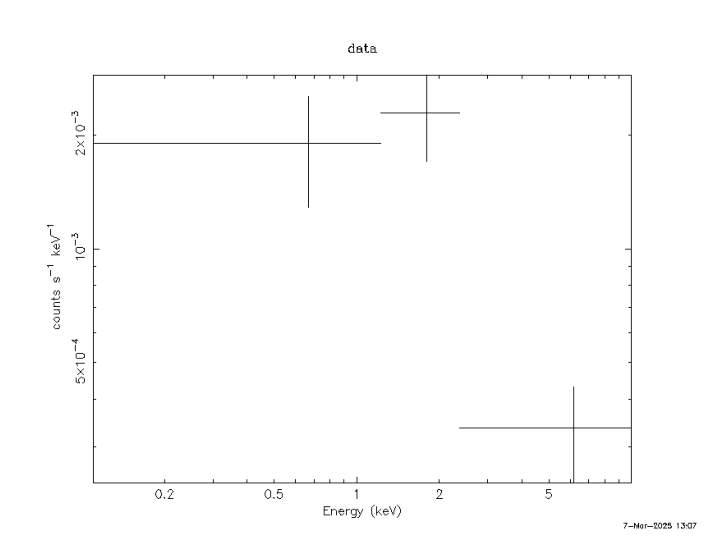

In [7]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.044025e+11     using 3 bins.

Tes

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 856.5, 656.5, -0.5)

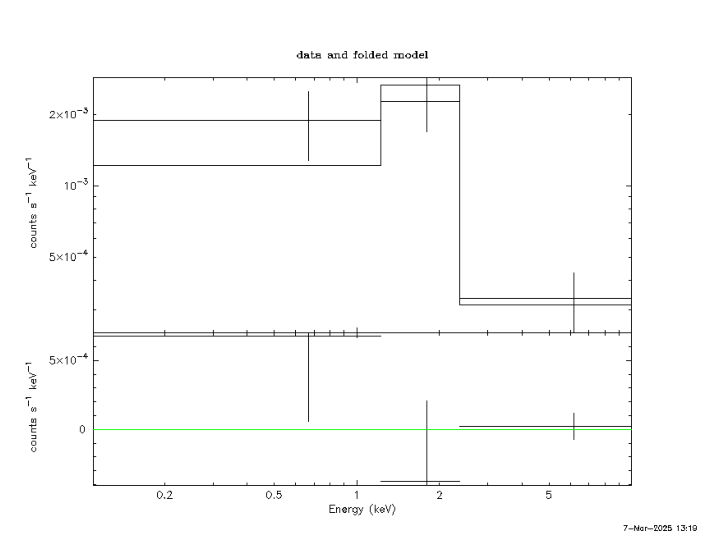

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [9]:
AllModels.clear()
moz = Model("ztbabs*bbody")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.043696e+11     using 3 bins.

Test statistic : Chi-Squared              1.043696e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.074578e+11     using 3 bins.

Test statistic : Chi-Squared              1.074578e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |be

GammQ: A <=  0
GammQ: A <=  0
GammQ: A <=  0


06e-05
14.3611      90253.8       0   3.58446e-06       2.87623   1.05030e-05
14.2619      90503.2       0   9.78248e-07       2.83823   1.02650e-05
14.1645      91777.7       0   3.38255e-07       2.80032   1.00239e-05
14.065       93502.8       0   2.37834e-08       2.76212   9.78245e-06
13.9618      95453.8       0   4.47375e-09       2.72350   9.54172e-06
13.8536      97550         0   2.10377e-09       2.68432   9.30216e-06
13.7405      99741.2       0   9.41200e-10       2.64461   9.06386e-06
13.6211      102046        0   3.71382e-10       2.60425   8.82695e-06
13.4957      104422        0   9.23885e-11       2.56327   8.59121e-06
13.3622      106926        0   2.41588e-11       2.52149   8.35729e-06
13.217       109440        0   7.46469e-12       2.47869   8.12745e-06
13.0789      111662        0   3.41150e-12       2.43638   7.88929e-06
12.906       115491        0   1.42405e-12       2.39123   7.66837e-06
12.7725      116876        0   4.71141e-13       2.34923   7.42125e-06

(-0.5, 859.5, 660.5, -0.5)

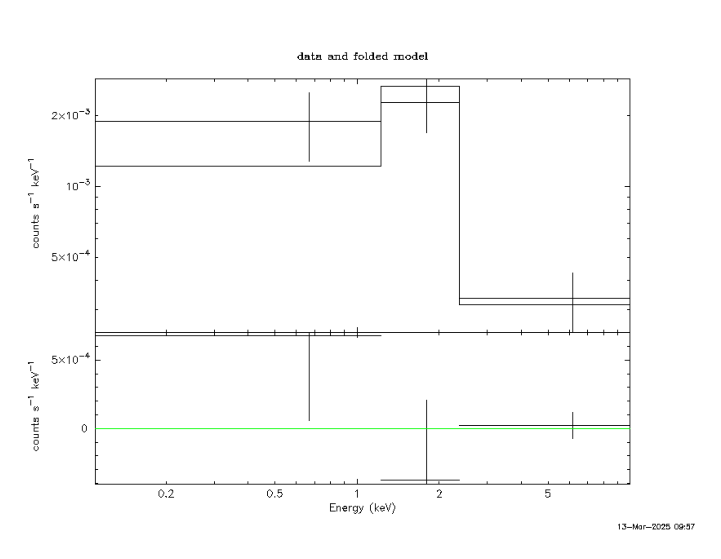

In [10]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
**tbabs :**

In [11]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.117834e+09     using 3 bins.

Test statistic : Chi-Squared              4.117834e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
2.0691       0.871452     -1      0.392959       8.43842   6.36504e-05
0.547037     4277.01      -1      0.114601       15.9199   5.05787e-05
0.393385     9055.3       -2     0.0584139       43.9824   5.80142e-05
0.146184     1766.92      -

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 859.5, 661.5, -0.5)

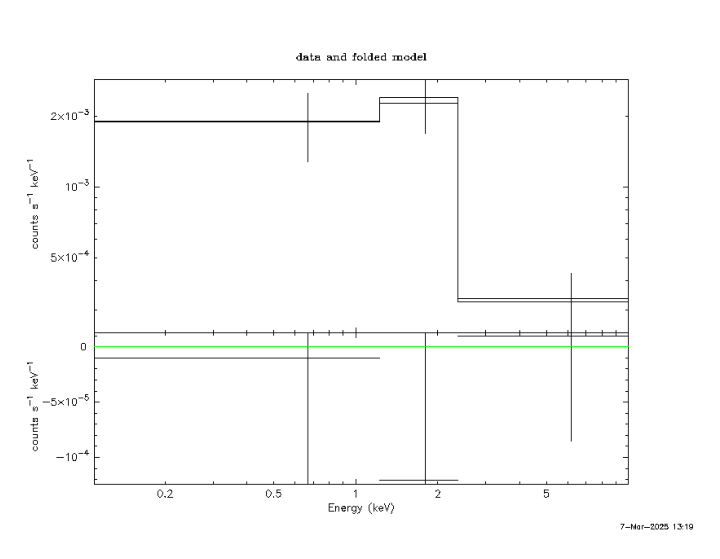

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [13]:
AllModels.clear()
moz = Model("ztbabs*bremss")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.101773e+09     using 3 bins.

Test statistic : Chi-Squared              4.101773e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              4.695913e+09     using 3 bins.

Test statistic : Chi-Squared              4.695913e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |b

GammQ: A <=  0
GammQ: A <=  0
GammQ: A <=  0


(-0.5, 854.5, 654.5, -0.5)

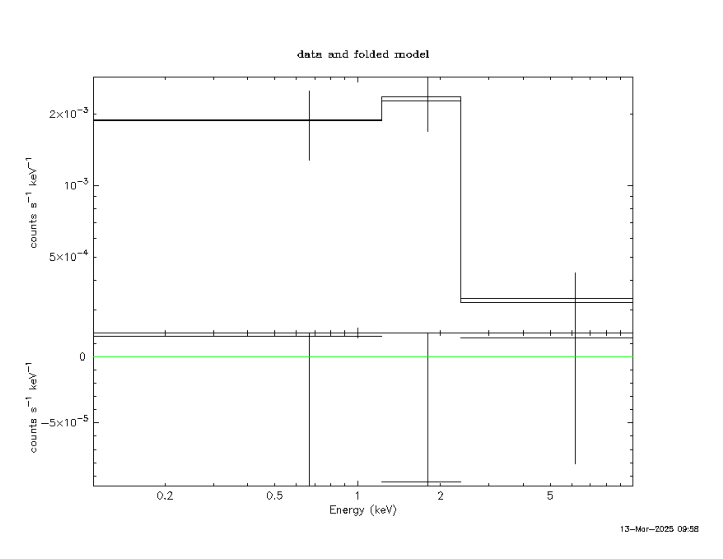

In [14]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model
**tbabs :**

In [15]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = moz.zTBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              6.041075e+08     using 3 bins.

Test statistic : Chi-Squared              6.041075e+08     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
7.32079      1.29997      -3      0.445316       4.31008   0.000110151
1.32248      25

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 860.5, 662.5, -0.5)

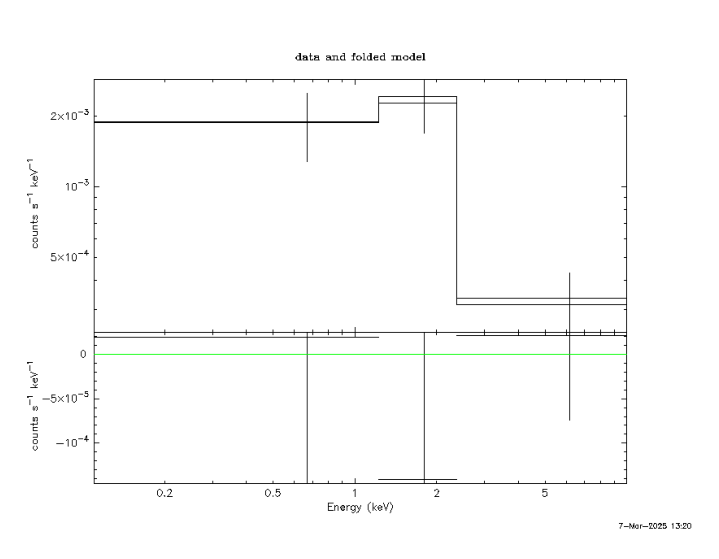

In [16]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [17]:
AllModels.clear()
moz = Model("ztbabs*apec")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.895224e+08     using 3 bins.

Test statistic : Chi-Squared              5.895224e+08     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              9.154177e+08     using 3 bins.

Test statistic : Chi-Squared              9.154177e+08     using 3 bins.
 Cannot calculate nul

GammQ: A <=  0
GammQ: A <=  0
GammQ: A <=  0


                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          3:kT        6:norm
7.4903       1.9728       -1      0.933779       1.48340   0.000150342
3.93919      13959.7      -1      0.488314       2.24632   0.000184854
3.76225      7576.09      -2      0.126128       5.10740   9.66275e-05
1.93338      19941.4      -3     0.0256563       16.2442   0.000115438
0.672086     3712.39      -4     0.0414305       59.8094   0.000178789
0.185598     3804.45      -1     0.0799728       62.7595   0.000187183
0.132392     1065.43      -1     0.0982772       63.4995   0.000193098
0.117279     1217.88       0      0.101977       63.9986   0.000192573
0.114183     586.357       0      0.103991       63.9998   0.000192501
0.113042     396.625       0      0.105225       63.9999   0.000192541
0.112592     310.97        0      0.106002       64.0000   0.000192623
0.112413     276.647       0      0.106508       64.0000   0.000192714
0.112349     266.853       0   

(-0.5, 855.5, 656.5, -0.5)

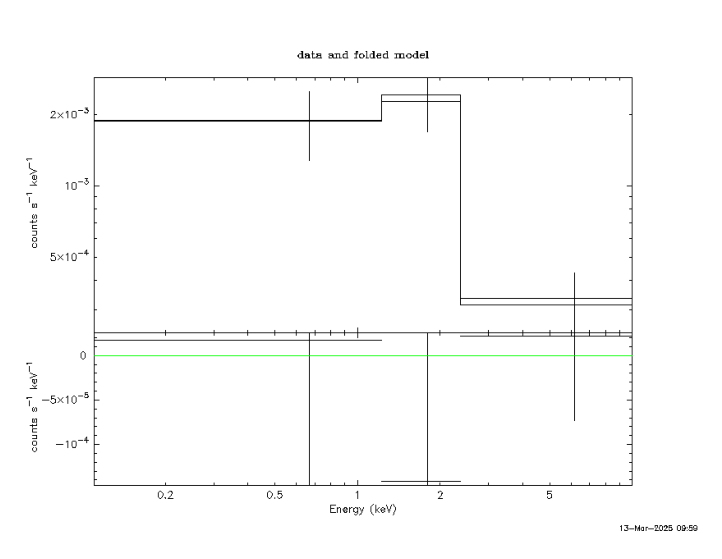

In [18]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec_z.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
**tbabs :**

In [19]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.591654e+10     using 3 bins.

Test statistic : Chi-Squared              2.591654e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
8.79236      1.70719      -2      0.419115      0.587770   1.55656e-05
4.75221      64573.1      -1     0.0883413      0.698173   1.42276e-05
0.532284     155655       -2     0.0388012       1.00335   2.13947e-05
0.00401432   59501.5     

GammQ: A <=  0
GammQ: A <=  0


.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   3.430e-02   9.377e-02   2.884e-06
   9.377e-02   3.339e-01   9.148e-06
   2.884e-06   9.148e-06   2.813e-10
------------------------------------

Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    5.17604E-02  +/-  0.185205     
   2    2   powerlaw   PhoIndex            1.08227      +/-  0.577842     
   3    2   powerlaw   norm                2.59887E-05  +/-  1.67709E-05  
________________________________________________________________________


Fit statistic  : Chi-Squared                   7e-16     using 3 bins.

Test statistic : Chi-Squared                   7e-16     using 3 bins.
 Cannot calculate null hypothesis probability.


(-0.5, 857.5, 664.5, -0.5)

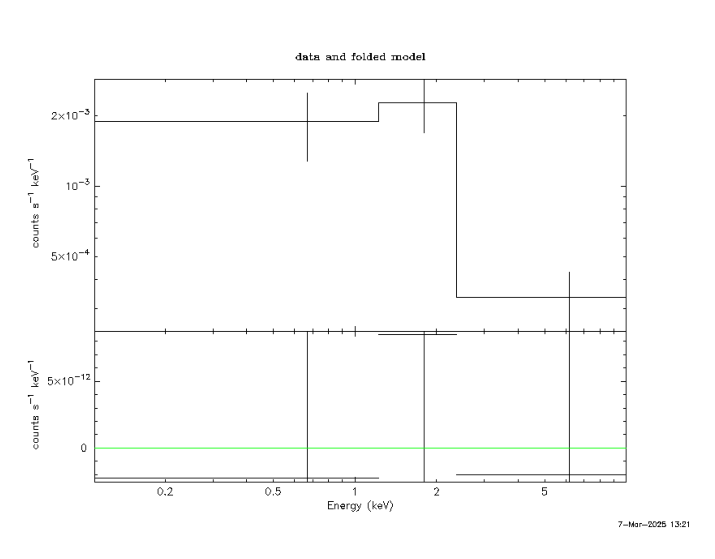

In [20]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [21]:
AllModels.clear()
moz = Model("ztbabs*powerlaw")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   4    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.586848e+10     using 3 bins.

Test statistic : Chi-Squared              2.586848e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.799254e+10     using 3 bins.

Test statistic : Chi-Squared              2.799254e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  

GammQ: A <=  0
GammQ: A <=  0
GammQ: A <=  0


(-0.5, 855.5, 659.5, -0.5)

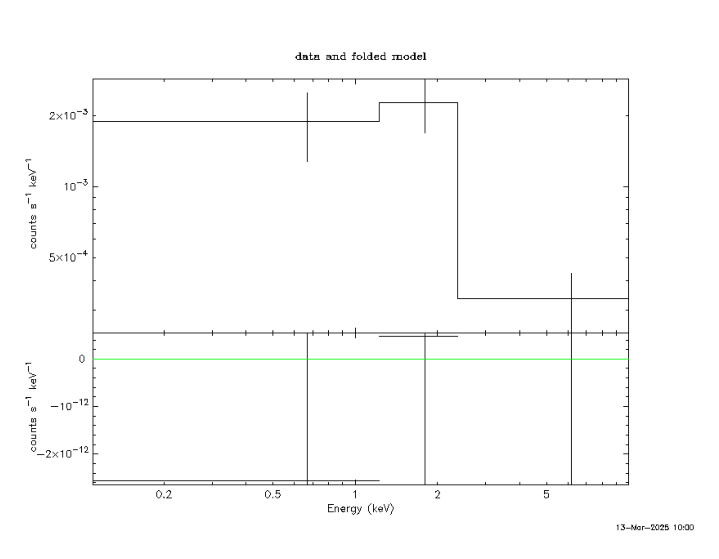

In [22]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw_z.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.9697976°
- Dec = -28.3050451°

53.97 -28.31

**Column density :** nH = 3*10^20 cm^-2

In [23]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print(f"(ztbabs) : {nH_bbody_z*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print(f"(ztbabs) : {nH_bremss_z*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print(f"(ztbabs) : {nH_apec_z*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print(f"(ztbabs) : {nH_powerlaw_z*10**22}")

The different models give a column density of :

bbody
(tbabs) : 8930.083444182217
(ztbabs) : 241256.758412705

bremss
(tbabs) : 8.10955874816909e+20
(ztbabs) : 9.09097925297893e+20

apec
(tbabs) : 9.667541050392344e+20
(ztbabs) : 1.0684910293581158e+21

powerlaw
(tbabs) : 5.176041588000071e+20
(ztbabs) : 5.729850683291616e+20


## Flux
### X-ray flux

In [24]:
AllModels.calcFlux(".2 12.0")

 Model Flux 7.9242e-05 photons (4.1689e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [25]:
Flux = 4.1689e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray  flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray  flux : F_X = 4.1689e-13 ergs/cm^2/s


### Optical flux

In [26]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 19.6328

F = F_optical(G)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux : F_opt = 1.4725474536744745e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [27]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 2.8310802409778155
F_x-ray = 2.8310802409778155*F_optical


## Luminosity

In [28]:
"""GAIA"""

P_mas = 0.7065 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")
print()

"""GLADE"""

d_kpc = 289897.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GAIA)
Distance : 4.3675866949752303e+21 cm
Luminosité : 9.993426219023611e+31 erg/s

(GLADE)
Distance : 8.945357900400001e+26 cm
Luminosité : 4.1920531875139955e+42 erg/s
